# (연습) 기댓값과 분산

**기본 설정**

Numpy와 Pandas 라이브러리를 각각 np와 pd로 불러온다.

In [1]:
import numpy as np
import pandas as pd

데이터프레임의 [chained indexing을 금지시키기 위한 설정](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy)을 지정한다.
Pandas 3.0 버전부터는 기본 옵션으로 지정된다.

In [2]:
pd.options.mode.copy_on_write = True

주피터 노트북에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.
아래 코드는 주피터 노트북에서만 사용하며 일반적인 파이썬 코드가 아니다.

In [3]:
%precision 6

'%.6f'

아래 코드는 데이터프레임 내에서 부동소수점의 출력을 소수점 이하 6자리로 제한한다.

In [4]:
pd.set_option('display.precision', 6)

데이터 시각화를 위해 `matplotlib.pyplot`를 `plt`라는 별칭으로 불러온다.

In [5]:
import matplotlib.pyplot as plt

**데이터 저장소 디렉토리**

코드에 사용되는 [데이터 저장소의 기본 디렉토리](https://github.com/codingalzi/DataSci/tree/master/data)를 지정한다.

In [6]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

## 이산 확률 변수에 대한 기댓값과 분산

**문제 1 (포아송 분포)**

이산 확률 분포에서 
**포아송 분포**<font size='2'>Poisson distribution</font>는
단위 시간 동안 또는 단위 공간에서 어떤 사건이 무작위로 발생하는 빈도를 가리키는 확률 변수의 분포다.

'단위 시간'은 1초, 1분, 30분, 1시간, 하루 등 특정 시간 간격을,
'단위 공간'은 구간, 거리, 공장, 병원, 프로그램 등 특정 기준의 크기로 
표현되는 공간의 크기를 가리킨다.

포아송 분포 예제:

- 일정 시간 동안의 매장 방문객 수
- 1킬로미터 당 횡단보도 수
- 10분 당 생산되는 불량제품 수
- 소스코드 100줄 당 오타 수
- 하루 동안의 응급환자 발생 수

예를 들어, 일평균 $\lambda$ 명의 응급환자가 발생하는 병원에서 하루 동안 발생하는 응급환자의 수를
확률 변수 `X`가 가리킨다고 하자.
그러면 하루에 $x$ 명의 응급환자가 발생할 확률을 계산하는
확률 질량 함수는 다음과 같다.

$$
f(x) = \frac{\lambda^x\, e^{-\lambda}}{x!}
$$

단, $x$는 음이 아닌 정수를 가리킨다.

포아송 분포를 따르는 이산 확률 변수 `X`에 대한 기댓값과 분산은 다음과 같다.

$$
E[X] = \lambda, \qquad V(X) = \lambda
$$

아래 `f_poisson()` 함수는 포아송 분포의 확률 질량 함수를 구현하며
두 개의 매개 변수를 사용한다.

- `x`: 확률 변수 $X$가 가리키는 값, 즉 단위 시간 당 사건 발생 횟수. 단 0에서 20까지만 값을 취함.
    `x`가 20보다 크면 $f(x)$는 사실상 0으로 간주될 정도로 매우 작음.
- `lam`: $\lambda$ 에 해당하는 값, 즉 단위 시간 당 사건 평균 발생 횟수.


In [7]:
from scipy.special import factorial

def f_poisson(x, lam):
    if x in range(21):
        return np.power(lam, x) * np.exp(-lam) / factorial(x)
    else:
        return 0

하루 평균 5명의 응급환자가 발생한다고 가정하자.
즉, $\lambda = 5$로 지정한다.

(1) 병원에서 하루에 2명의 응급환자가 발생할 확률을 계산하라.

In [8]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


(2) 병원에서 하루에 3명에서 5명 사이의 응급환자가 발생할 확률을 계산하라.

In [9]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


(3) 확률 변수 `X`의 기댓값과 분산이 5로 계산됨을 확인하라.

In [10]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


(4) 확률 변수 `X`의 확률 분포, 즉 $\lambda=5$일 때의 포아송 분포를 (막대) 그래프로 그려라.

In [11]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


**문제 2 (포아송 분포)**

`scipy.stats` 모듈의 `poisson` 객체가 포아송 분포를 따르는 확률 변수를 가리킨다.
`poisson` 은 `scipy.stats` 모듈의 `rv_discrete` 클래스의 인스턴스이며,
확률 질량 함수(pmf), 누적 분포 함수(cdf) 등 이산 확률 분포의 기본 기능을 
인스턴스 메서드로 제공한다.

In [12]:
from scipy.stats import poisson

예를 들어, 포아송 분포의 특성을 지정할 때 사용되는 모수 $\lambda$가 5일 때의 
포아송 분포를 따르는 확률 변수를 가리키는 객체를 두 가지 방식으로 정의할 수 있다.

참고로 변수 이름에 사용되는 `rv`는 random variable, 즉 확률 변수의 줄임말이다.

- 방식 1: 모수 고정

In [13]:
lam = 5

rv_poisson5 = poisson(lam)

`poisson` 객체의 `pmf()` 메서드, `cdf()` 메서드가
각각 확률 질량 함수, 누적 분포 함수를 가리킨다.
`lam=5`일 때의 포아송 분포의 막대그래프를 그리면 앞서 그린 그래프와 동일하게 그려진다.
여기서도 `range(21)`을 확률 변수의 범위로 지정한다.

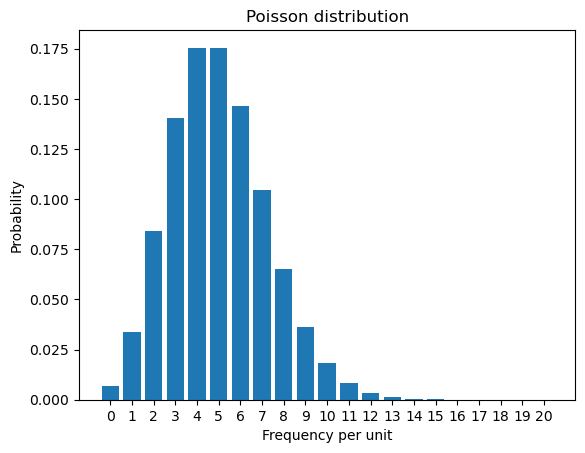

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)

xs = range(21)
ax.bar(xs, rv_poisson5.pmf(xs))

ax.set_title('Poisson distribution')
ax.set_xlabel('Frequency per unit')
ax.set_ylabel('Probability')

ax.set_xticks(np.arange(21))
ax.set_xticklabels(range(21))

plt.show()

- 방식 2: 모수 파라미터 활용

In [15]:
rv_poisson = poisson

`poisson` 객체의 `pmf()` 메서드, `cdf()` 메서드 등을 호출할 때 모수 파라미터를 항상 함께 사용해야 한다.
아래 그래프에서도 `range(21)`을 확률 변수의 범위로 지정한다.

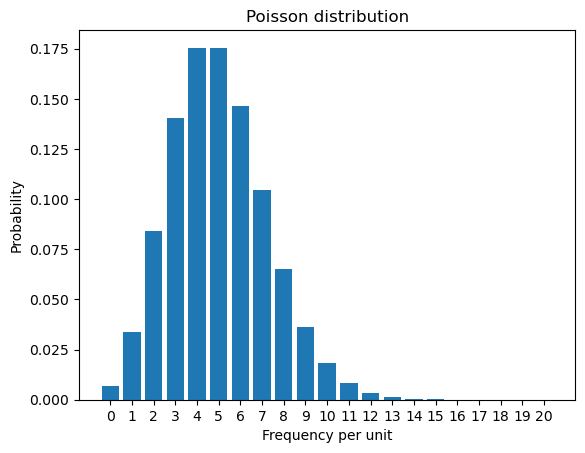

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)

lam = 5

xs = range(21)
ax.bar(xs, rv_poisson.pmf(xs, lam))

ax.set_title('Poisson distribution')
ax.set_xlabel('Frequency per unit')
ax.set_ylabel('Probability')

ax.set_xticks(np.arange(21))
ax.set_xticklabels(range(21))

plt.show()

(1) $\lambda$ 에 대한 모수를 3, 7, 10 등으로 변화시킬 때 포아송 분포의 막대그래프를 확인하라.

In [17]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


(2) 선그래프를 이용하여 $\lambda$ 에 대한 모수가 1, 2, 3, 5, 7, 10일 때의 확률 질량 함수 그래프를 함께 그려서
기댓값이 커질 수록 봉우리가 오른쪽으로 이동하면서 낮아지는 사실을 확인하라.

In [18]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


**문제 3 (포아송 분포)**

포아송 분포는 다양한 현상에 적용될 수 있다.
`rv_poisson` 변수가 가리키는 `poisson` 객체를 이용하여 아래 질문에 답하라.

(1) 쇼핑몰 콜센터에 한 시간 동안 평균 60회 문의전화가 걸려온다.
5분 동안 전화가 3회에서 5회 걸려올 확률은 얼마인가?

In [19]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


(2) 새로 포장된 도로에 한달 동안 1km 당 평균 2회 도로파손이 발생한다.
3km의 길이에 한달 동안 도로파손이 3회 미만 발생할 확률은 얼마인가?

In [20]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


(3) 주중 출근시간대에 커피 주문이 20분 동안 평균 10번 발생한다. 
주중 출근시간대에 10분 동안에 7번 이상의 커피주문을 받을 확률은 얼마인가?

In [21]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


**문제 4 (타이타닉호 승객 나이대 분포)**

아래 코드는 타이타닉호의 승객에 대한 정보와 생존 여부를 담은 데이터셋을 불러와서
다음 전처리를 실행한다.
코드에 대한 보다 자세한 설명은
[(연습) 이산 확률 분포](https://colab.research.google.com/github/codingalzi/DataSci/blob/master/practices/practice-probability_discrete.ipynb)를
참고한다.

- `PassengerId` 특성을 인덱스로 지정
- `Embarked` 특성의 결측치를 모두 해당 특성의 최빈값으로 대체
- `Age` 특성의 결측치를 성(Sex)별 중앙값으로 대체
- `Age` 특성을 10살 단위로 구분하는 연령구간을 지정하여 `Age_Bucket` 특성으로 추가

In [22]:
titanic = pd.read_csv(data_url+"titanic.csv")
titanic = titanic.set_index("PassengerId")

embarked_mode =(titanic['Embarked'].mode().values)[0]
titanic['Embarked'] = titanic['Embarked'].fillna(embarked_mode)

f_mask = titanic["Sex"]=="female"
f_age_median = titanic.loc[f_mask, "Age"].median()
m_age_median = titanic.loc[~f_mask, "Age"].median()

titanic.loc[f_mask, 'Age'] = titanic.loc[f_mask, 'Age'].fillna(f_age_median)
titanic.loc[~f_mask, 'Age'] = titanic.loc[~f_mask, 'Age'].fillna(m_age_median)

titanic['Age_Bucket'] = (titanic["Age"] // 10 * 10).astype('i8')

확률 변수 $X$가 타이타닉 데이터셋에서 임의로 선택된 사람의 나이대를 가리킨다고 하면
아래 `prob_age` 변수가 확률 변수 `X`에 대한 확률 분포를,
`f_age()` 함수는 확률 질량 함수를 가리킨다.

In [23]:
age_stratified_count = titanic.loc[:, ['Age_Bucket', 'Age']].groupby('Age_Bucket', observed=True, group_keys=True).count()
age_stratified_ratio = age_stratified_count / len(titanic)

# 데이터프레임으로 변환
prob_age = age_stratified_ratio.iloc[:, 0:1]
# 컬럼과 인덱스 이름 지정
prob_age.columns = ['확률']
prob_age.index.name = 'X'

# 가로형의 데이터프레임으로 변환
prob_age = prob_age.T

In [24]:
prob_age

X,0,10,20,30,40,50,60,70,80
확률,0.069585,0.114478,0.445567,0.18743,0.099888,0.053872,0.021324,0.006734,0.001122


(1) 확률 변수 `X`의 확률 분포를 그래프로 그려라.

In [25]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


(2) 확률 변수 `X`의 기댓값을 가리키는 변수 `mu_age`를 선언하라.

In [26]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


(3) 확률 변수 `X`의 표준편차를 가리키는 변수 `sigma_age`를 선언하라.

In [27]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


(4) 확률 변수 `X`가 가리키는 나이대는 10살 기준으로 구분하였다.
나이대별 평균 나이를 가리키는 확률 변수 `Y`를 확률 변수 `X`의 선형 변환으로 정의하라.

In [28]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


(5) 확률 변수 `Y`의 기댓값과 표준편차를 확률 변수 선형 변환 공식을 이용하여 계산하라.

In [29]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


## 연속 확률 변수에 대한 기댓값과 분산

**지수 분포**

포아송 분포를 따르는 사건이 발생한 후에 다시 발생할 때까지 걸리는 시간에 대한 연속 확률 변수가 따르는 확률 분포를
**지수 분포**<font size='2'>exponential distribution</font>라 부른다.
지수 분포의 확률 밀도 함수는 다음과 같다. 

- $x$: 확률 변수 $X$가 가리키는 값, 마지막 사건 발생 후 경과한 시간.
- $\lambda$: 포아송 분포의 모수. 즉, 단위 시간 동안 어떤 사건이 무작위로 발생하는 빈도를 가리키는 파라미터.

$$
f(x) = \lambda\, e^{-\lambda x}
$$

지수 분포를 따르는 확률 변수 $X$의 누적 분포 함수는 확률 밀도 함수의 적분 함수로 다음과 같다.
단, $x$는 양의 실수를 가리킨다.

$$
P(X \le x) = F(x) = 1 - e^{-\lambda x}
$$

음의 실수 $x$에 대해서는 $f(x)$ 와 $F(x)$ 모두 0으로 선언된다.

지수 분포를 따르는 확률 변수 `X`에 대한 기댓값과 분산은 다음과 같으며 증명은 생략한다.

$$
E[X] = \frac{1}{\lambda}, \qquad V(X) = \frac{1}{\lambda^2}
$$

아래 `f_expon()` 함수는 지수 분포의 확률 밀도 함수를 구현하며
앞서 설명한 두 개의 매개 변수를 사용한다.

In [30]:
def f_expon(x, lam):
    if x >= 0:
        return lam * np.exp(-lam * x)
    else:
        return 0

`F_expon()` 함수는 지수 분포의 누적 분포 함수를 구현한다.

In [31]:
def F_expon(x, lam):
    if x >= 0:
        return 1 - np.exp(-lam * x)
    else:
        return 0

**문제 4 (지수 분포)**

병원에서 하루 평균 5명의 응급환자가 발생하고,
마지막 응급환자 이후에 다른 응급 환자가 발생할 때까지 걸리는
시간을 확률 변수 $X$가 가리킨다고 가정하자.

(1) 마지막 응급환자 이후에 3시간 이내에 다시 응급환자가 발생할 확률을 계산하라.

In [32]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


(2) 병원에서 3시간에서 5시간 사이에 새로운 응급환자가 발생할 확률을 계산하라.

In [33]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


(3) $\lambda$ 가 1, 3, 5일 때의 지수 분포에 대한 확률 밀도 함수의 선그래프가 변하는 모양을 확인하라.

In [34]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


**문제 5 (지수 분포)**

`scipy.stats` 모듈의 `expon` 객체가 지수 분포를 갖는 확률 변수를 가리킨다.
`expon` 은 `scipy.stats` 모듈의 `rv_continuous` 클래스의 인스턴스이며,
확률 밀도 함수(pdf), 누적 분포 함수(cdf) 등 연속 확률 분포의 기본 기능을
인스턴스 메서드로 제공한다.

In [35]:
from scipy.stats import expon

지수 분포를 선언할 때 필요한 포아송 분포의 모수 $\lambda$는 
`expon` 객체를 선언할 때 필요한 `scale` 키워드 인자의 값으로 지정된다.
단 $\lambda$가 아닌 $1/\lambda$을 사용함에 주의한다.

예를 들어, 일평균 5명의 응급환자가 발생하는 병원에서 새로운 응급환자가 발생할 때까지의
시간을 가리키는 확률 변수 객체는 다음과 같이 선언된다.

In [36]:
rv_expon_1over5 = expon(scale=1/5)

새로운 응급환자가 3분 이내에 발생할 확률은 다음과 같다.

In [37]:
rv_expon_1over5.cdf(3/24)

0.464739

계산된 확률이 앞서 `F_expon()` 함수를 이용하여 계산된 `F_expon(3/24, 5)` 와 동일하다.

In [38]:
F_expon(3/24, 5)

0.464739

`poisson` 객체를 이용하여 아래 질문에 답하라.

(1) 시간당 평균 5회 사용자 접속이 발생하는 웹페이지가 있다.
마지막 사용자 접속 후 1분 이내에 새로운 사용자 접속이 발생할 확률은 얼마인가?

In [39]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


(2) 어느 회사의 스마트폰의 평균 수명이 3년일 때, 해당 회사의 스마트폰을 새로 구입했을 때
5년 이상 고장 없이 사용하게될 확률은 얼마인가?

In [40]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.


(3) 진료 대기 시간이 평균 6분인 병원에 도착해서 3분에서 10분 사이에 진료를 받을 확률은 얼마인가?

In [41]:
# 코드를 작성한다.
# 필요하면 코드셀 또는 텍스트셀을 추가할 수 있습니다.
